# 1) Exercise 2.3 

## Modify program 2.1 by using a different way to specify the boundary described in Table 2.2. Make sure it gives a reasonable answer.

## Method 1: DomainBoundary()

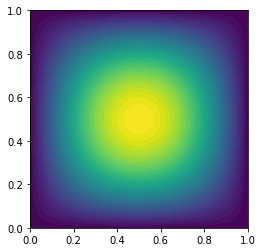

In [12]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = pi*pi*sin(pi*x)*sin(pi*y)

on the unit square with Dirichlet boundary conditions given by u=0 
on the boundary of the square, whose solution is

    u(x, y) = sin(pi*x)*sin(pi*y)

"""
from fenics import *
import matplotlib.pyplot as plt
#from dolfin import *

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
#def boundary(x):
#    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, DomainBoundary())
#bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
you = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))",degree=1)
a = inner(grad(u), grad(v))*dx
L = (2*3.141592*3.141592)*you*v*dx 

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u, interactive=False, wireframe=True)

## Method 2: "on_boundary"

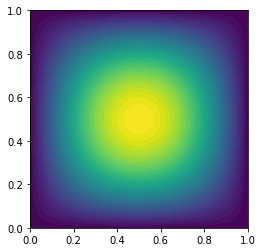

In [13]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = pi*pi*sin(pi*x)*sin(pi*y)

on the unit square with Dirichlet boundary conditions given by u=0 
on the boundary of the square, whose solution is

    u(x, y) = sin(pi*x)*sin(pi*y)

"""
from fenics import *
import matplotlib.pyplot as plt
#from dolfin import *

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
#def boundary(x):
#    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, "on_boundary")
#bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
you = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))",degree=1)
a = inner(grad(u), grad(v))*dx
L = (2*3.141592*3.141592)*you*v*dx 

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u, interactive=False, wireframe=True)

## Method 3: Boundary

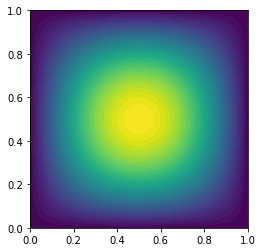

In [14]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = pi*pi*sin(pi*x)*sin(pi*y)

on the unit square with Dirichlet boundary conditions given by u=0 
on the boundary of the square, whose solution is

    u(x, y) = sin(pi*x)*sin(pi*y)

"""
from fenics import *
import matplotlib.pyplot as plt
#from dolfin import *

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
#bc = DirichletBC(V, u0, "on_boundary")
bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
you = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))",degree=1)
a = inner(grad(u), grad(v))*dx
L = (2*3.141592*3.141592)*you*v*dx 

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u, interactive=False, wireframe=True)

# 2) Exercise 2.6

## Implement the code for the inhomogeneous Neumann boundary conditions described in Section 2.5.2, whose exact solution is u(x,y) = xy(1-y)

L2 Error = 7.349029908394326e-05


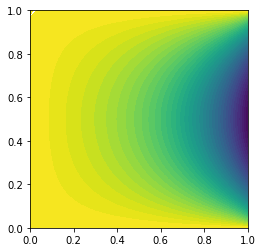

In [11]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = 2x

on the unit square with Neumann boundary condition

        du/dn = g on { x = 1 },  g(y)=y(1-y)

on part of the boundary of the square, whose solution is 
u(x,y)=y(1-y)x

"""
#from dolfin import *  ## import from fenics not from dolfin, these days...
from fenics import *
import sys
import matplotlib.pyplot as plt
import plotsp

pdeg=1
nx = 32; ny = 32; meshsize = nx
# Create mesh and define function space
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, "Lagrange", pdeg)

#Dirichlet boundary (x=0 or y=0 or y=1)
def boundary(x):
  return x[0] < DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("2.0*x[0]",degree=pdeg)
g = Expression("x[1]*(1-x[1])",degree=pdeg)
ue = Expression("x[0]*x[1]*(1-x[1])",degree=pdeg+3)
a = inner(grad(u), grad(v))*dx 
L = f*v*dx + g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

uze=interpolate(ue,V) ## interpolate exact error onto mesh


# Plot solution

#plotsp.save_soln(mesh,cells,u,'u_2_3.png')
# plot(mesh)
# plt.savefig('mesh_2_3.png',dpi=300)



plot(u - uze, interactive = False, wireframe = True)
print('L2 Error =', errornorm(uze,u,norm_type='l2', degree_rise=3))

# 3) Exercise 3.1


$ \epsilon $

# 4) Exercise 4.1


## Repeat the experiments recordered in Table 4.1 but with the manufactured solution in Exercise 2.4. Explain why the error is so small for high-degree polynomial approximation even for a coarse mesh

In [9]:
from fenics import *
from math import pi as pi
from math import log2 as log2
from timeit import default_timer as timer

startime=timer()
#meshsize=int(sys.argv[1])
#pdeg=int(sys.argv[2])
pvec     = [1, 2, 4, 8, 16]
meshvec  = [32,64,128,256]
#meshvec = [32, 64, 128, 256]
p_err = 1.0 ## placeholder

#for pdeg in pvec:
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[0]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

meshvec  = [8,16,32,64]
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[1]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

meshvec  = [8,16,32,64,128]
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[2]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

meshvec  = [8,16,32,64,128]
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[3]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

meshvec  = [2,4,8,16,32]
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[4]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

meshvec  = [1,2,4,8]
for meshsize in meshvec:
  #meshsize = meshvec[0] 
  pdeg = pvec[5]
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1 or y = 0 or y = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS or x[1] > 1.0 - DOLFIN_EPS
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f = Expression("(sin(mypi*x[0]))*(sin(mypi*x[1]))",mypi=pi,degree=pdeg+3,quadrature_degree= 3)
  a = inner(grad(u), grad(v))*dx
  L = (2*pi*pi)*f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == L, u, bc)
  aftersolveT=timer()
  totime=aftersolveT-startime

  l2err = errornorm(f,u,norm_type='l2',degree_rise=3)
  erate  = log2(p_err/l2err)
  #print("deg: ",pdeg,", meshsize h:%.3e"%(1.0/meshsize),", l2 error: %.2e"%l2err,", time:%.3f"%totime,"sec, rate: %.2e"%erate)
  #p_err = l2err
    
  print("deg: ", pdeg,'|' "meshnumber", meshsize, '| '  "l2 error:", l2err, '|', "rate", erate,'|', "time", totime)

deg:  1 |meshnumber 32 | l2 error: 0.0013504362436108992 | rate 9.532358755291058 | time 0.03071568099949218
deg:  1 |meshnumber 64 | l2 error: 0.00033799233477614974 | rate 11.530721851106582 | time 0.18474961100037035
deg:  1 |meshnumber 128 | l2 error: 8.452209814446664e-05 | rate 13.530311893805624 | time 0.8828877689993533
deg:  1 |meshnumber 256 | l2 error: 2.1132026740988452e-05 | rate 15.530209333810813 | time 3.1977163729989115
deg:  2 |meshnumber 8 | l2 error: 0.0005480639848169193 | rate 10.833368046237076 | time 7.195118248999279
deg:  2 |meshnumber 16 | l2 error: 6.873917799627178e-05 | rate 13.828507874803892 | time 7.2243191369998385
deg:  2 |meshnumber 32 | l2 error: 8.600535401771917e-06 | rate 16.827142095853823 | time 7.304472182999234
deg:  2 |meshnumber 64 | l2 error: 1.0753466641334873e-06 | rate 19.826766746716004 | time 7.6070052689992735
deg:  4 |meshnumber 8 | l2 error: 7.760788027665492e-07 | rate 20.297293513618236 | time 8.080312632999266
deg:  4 |meshnumbe

------------------- Start compiler output ------------------------
c++: internal compiler error: Killed (program cc1plus)
Please submit a full bug report,
with preprocessed source if appropriate.
See <file:///usr/share/doc/gcc-7/README.Bugs> for instructions.

-------------------  End compiler output  ------------------------
Compilation failed! Sources, command, and errors have been written to: /home/fenics/jitfailure-ffc_element_ad8b9af021b923dc1f1b19e9fe9a539611fd8697


DijitsoError: Dijitso JIT compilation failed, see '/home/fenics/jitfailure-ffc_element_ad8b9af021b923dc1f1b19e9fe9a539611fd8697' for details

# 5) Exercise 4.3 

## Repeat the experiments recorded in Table 4.1 solving (2.12) but computing the H1 norm of the error as well as the L2 error. Explain what you find. Do you find the expected inmprovement in accuracy as described in Section 4.4.1?